# 1. 실험 준비

## 1-1. 라이브러리 선언

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from matplotlib.colors import LinearSegmentedColormap

from util.util import data_split, get_label, ECG_metrics, PPG_metrics, process_subject_PTT, process_biosignals_rr_si, process_biosignals_gsr, save_joined_features, load_subject_data, process_labels, get_corr

## 1-2. Subject 및 전역 변수 선언

In [2]:
subject_list =[
 '1_1_011_V2',
 '1_1_015_V2',
 '1_1_025_V1',
 '1_1_027_V1',
 '1_1_028_V1',
 '1_1_029_V1',
 '1_1_034_V1',
 '1_1_035_V1',
 '1_1_036_V1',
 ]
# 예시 Subject
subject = '1_1_011_V2'

# 디렉토리 설정
feature_dir = r"..\features_3_2\\"
label_path = feature_dir+r"label\\"
sam_result_path = r'..\data\SAM\\'
split_data_dir = r'..\data\split_data_3_2\\'
raw_data_dir = r'..\data\raw_data\\'
feature_joined_dir = feature_dir+r"joined\\"
feature_save_dir = feature_dir+r"results\\"

# 2. Raw 데이터 준비
## 2-1. 데이터 분할 (Data Split)

In [3]:
for subject_name in subject_list:
    data_split(raw_data_dir+subject_name, split_data_dir+subject_name, True)

data_split_result = pd.read_csv(split_data_dir+subject+'/ECG/high/high1.csv')
data_split_result

..\data\raw_data\\1_1_011_V2 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_011_V2폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_015_V2 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_015_V2폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_025_V1 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_025_V1폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_027_V1 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_027_V1폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_028_V1 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_028_V1폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_029_V1 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_029_V1폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_034_V1 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_034_V1폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_035_V1 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_035_V1폴더에 Split데이터를 저장했습니다.

..\data\raw_data\\1_1_036_V1 데이터 Split 처리 시작
..\data\split_data_3_2\\1_1_036_V1폴더에 Split데이터를 저장했습니다.



,Shimmer_820D_Timestamp_Unix_CAL,Shimmer_820D_ECG_EMG_Status1_CAL,Shimmer_820D_ECG_EMG_Status2_CAL,Shimmer_820D_ECG_LA-RA_24BIT_CAL,Shimmer_820D_ECG_LL-LA_24BIT_CAL,Shimmer_820D_ECG_LL-RA_24BIT_CAL,Shimmer_820D_ECG_Vx-RL_24BIT_CAL,Unnamed: 7
0,1.757987e+12,128.0,128.0,0.750786,-2.822913,-2.072127,-12.091840,NaN
1,1.757987e+12,128.0,128.0,0.745954,-2.824571,-2.078617,-12.066670,NaN
2,1.757987e+12,128.0,128.0,0.751003,-2.806613,-2.055611,-12.115280,NaN
3,1.757987e+12,128.0,128.0,0.743141,-2.794280,-2.051139,-12.092057,NaN
4,1.757987e+12,128.0,128.0,0.745016,-2.777692,-2.032676,-12.106048,NaN
...,...,...,...,...,...,...,...,...
25710,1.757987e+12,128.0,128.0,1.500995,-1.944471,-0.443476,-11.867542,NaN
25711,1.757987e+12,128.0,128.0,1.502582,-1.959977,-0.457395,-11.846338,NaN
25712,1.757987e+12,128.0,128.0,1.518377,-1.949087,-0.430710,-11.874249,NaN
25713,1.757987e+12,128.0,128.0,1.522776,-1.924926,-0.402150,-11.900934,NaN


## 2-2. Data Label Generation

In [4]:
Label_result = get_label(base_dir=raw_data_dir+subject, sam_result_path=sam_result_path, subject_path=subject, output_dir=label_path)
Label_result

..\data\raw_data\\1_1_011_V2 Label 정보 처리 시작
..\features_3_2\\label\\1_1_011_V2.csv에 Label 정보를 저장했습니다.



,File,label-3.5_more,label-3.5_over,label-avg,Q1,Q2
0,low1.csv,0,0,0.0,0,0
1,low2.csv,0,0,0.0,0,0
2,low3.csv,0,0,0.0,0,0
3,low4.csv,0,0,0.0,0,0
4,low5.csv,0,0,0.0,0,0
5,low6.csv,0,0,0.0,0,0
6,mid1.csv,0,0,0.0,0,0
7,mid2.csv,0,0,1.5,3,0
8,mid3.csv,0,0,0.0,0,0
9,mid4.csv,0,0,0.0,0,0


# 3. 생체신호 특징 추출
## 3-1. ECG, PPG HR_HRV
### 3-1-1. ECG HR_HRV

In [5]:
ECG_HR_HRV_save_path = feature_dir+r"HR_HRV\\ECG\\"+subject

ECG_HR_HRV_result = ECG_metrics(os.path.join(split_data_dir, subject)+"\\ECG", save_path=ECG_HR_HRV_save_path)
ECG_HR_HRV_result

..\data\split_data_3_2\\1_1_011_V2\ECG ECG Signal - HR, HRV 분석 시작
..\features_3_2\\HR_HRV\\ECG\\1_1_011_V2\1_1_011_V2.csv에 ECG Signal - HR, HRV 분석 결과를 저장했습니다.


,File,channel,HR,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,control1.csv,LA_RA,74.793847,802.569322,42.029801,NaN,NaN,NaN,NaN,NaN,...,1.006805,5.195178,1.195790,1.358684,0.910055,0.978088,1.706492,1.835146,1.996256,0.952778
1,control1.csv,LL_LA,74.791738,802.596831,42.040921,NaN,NaN,NaN,NaN,NaN,...,1.163151,5.364192,1.199703,1.344844,1.306307,1.454278,1.716482,1.835657,2.000424,0.952778
2,control1.csv,LL_RA,74.791924,802.596831,42.005908,NaN,NaN,NaN,NaN,NaN,...,1.142097,5.278278,1.211622,1.202309,1.143558,1.320847,1.737811,1.835498,2.002508,0.866162
3,control1.csv,Vx_RL,74.794622,802.569322,42.054429,NaN,NaN,NaN,NaN,NaN,...,1.285198,5.385456,1.203660,1.393483,1.107491,1.155956,1.849634,1.834180,2.000424,0.952778
4,end1.csv,LA_RA,78.350726,765.755208,29.129826,NaN,NaN,NaN,NaN,NaN,...,1.491655,5.081631,1.368162,1.275449,0.807091,1.337719,1.760663,1.862438,3.145242,1.245764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,mid5.csv,Vx_RL,73.241312,819.295247,27.488780,NaN,NaN,NaN,NaN,NaN,...,inf,4.761842,1.496542,NaN,0.000000,0.000000,2.491066,1.940085,4.592174,1.163534
84,start1.csv,LA_RA,79.730734,752.621299,59.158350,NaN,NaN,NaN,NaN,NaN,...,1.172720,5.691814,0.868742,0.871618,1.019680,1.343463,1.715302,1.478053,1.826775,0.575467
85,start1.csv,LL_LA,79.725996,752.646998,59.213480,NaN,NaN,NaN,NaN,NaN,...,1.247032,5.612866,0.870433,0.624949,0.968962,1.261006,1.672951,1.480150,1.823616,0.575467
86,start1.csv,LL_RA,79.726315,752.646998,59.228939,NaN,NaN,NaN,NaN,NaN,...,1.187843,5.675430,0.868395,0.985380,0.974733,1.220224,1.736408,1.483196,1.824611,0.575467


## 3-1-2. PPG HR_HRV

In [6]:
PPG_HR_HRV_save_path = feature_dir+r"HR_HRV\\PPG\\"+subject

PPG_HR_HRV_result = PPG_metrics(os.path.join(split_data_dir, subject)+"\\PPG", save_path=PPG_HR_HRV_save_path)
PPG_HR_HRV_result

..\data\split_data_3_2\\1_1_011_V2\PPG PPG Signal - HR, HRV 분석 시작
..\features_3_2\\HR_HRV\\PPG\\1_1_011_V2\1_1_011_V2.csv에 PPG Signal - HR, HRV 분석 결과를 저장했습니다.


,File,channel,HR,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,control1.csv,ppg,74.974340,800.781250,47.162958,NaN,NaN,NaN,NaN,NaN,...,1.673976,3.158646,1.251331,1.169525,1.001060,1.010410,1.470403,1.823208,1.866049,0.942627
1,end1.csv,ppg,78.348128,766.145833,30.219041,NaN,NaN,NaN,NaN,NaN,...,1.746909,2.581590,1.409175,1.205974,0.995721,1.100123,0.871467,1.828831,3.258405,1.079662
2,high1.csv,ppg,74.778557,802.382172,32.544612,NaN,NaN,NaN,NaN,NaN,...,1.536235,2.603172,1.262478,1.151919,0.893195,0.882681,0.823186,1.786617,2.623491,1.069477
3,high2.csv,ppg,75.061770,799.457097,33.607610,NaN,NaN,NaN,NaN,NaN,...,1.276293,2.738377,1.451623,0.593726,0.871824,0.905863,0.814910,1.978206,2.519035,0.897352
4,high3.csv,ppg,72.514633,827.256944,31.204344,NaN,NaN,NaN,NaN,NaN,...,1.417066,2.571013,1.567166,0.000000,0.866060,0.874127,0.629120,2.013709,3.026159,0.976329
5,high4.csv,ppg,73.943779,811.567164,34.217052,NaN,NaN,NaN,NaN,NaN,...,2.014903,2.749999,1.484751,0.951666,1.368390,1.350196,1.051886,1.866853,3.224590,1.177002
6,high5.csv,ppg,71.299928,841.557018,37.329130,NaN,NaN,NaN,NaN,NaN,...,1.148623,2.830006,1.191028,0.000000,0.955598,1.318366,0.844857,1.716691,2.756331,0.716320
7,high6.csv,ppg,75.481918,795.200893,22.116327,NaN,NaN,NaN,NaN,NaN,...,1.763589,2.178657,1.991092,0.843257,0.770779,0.765718,0.372395,2.031563,4.410982,1.283885
8,high7.csv,ppg,74.436819,806.189904,38.987307,NaN,NaN,NaN,NaN,NaN,...,1.540445,2.961880,1.528761,0.834363,1.153326,1.711985,1.068179,1.783813,3.544902,0.833866
9,intervene1.csv,ppg,73.628945,815.290179,27.956726,NaN,NaN,NaN,NaN,NaN,...,1.670063,2.475908,1.577338,1.042505,1.150766,1.082950,0.641467,1.985512,5.221296,1.225857


## 3-2. PTT Calculate

In [7]:
PTT_save_dir = feature_dir+r"PTT"

PTT_result = process_subject_PTT(os.path.join(split_data_dir, subject), subject, save_path=PTT_save_dir)
PTT_result

..\data\split_data_3_2\\1_1_011_V2 PTT 분석 시작
..\features_3_2\\PTT\1_1_011_V2.csv에 PTT 계산 결과를 저장했습니다.


,Subject,File,LA-RA_PTT_avg,LA-RA_PTT_std,LL-LA_PTT_avg,LL-LA_PTT_std,LL-RA_PTT_avg,LL-RA_PTT_std,Vx-RL_PTT_avg,Vx-RL_PTT_std
0,1_1_011_V2,start1.csv,340.325234,4.878096,319.018390,4.546275,325.258260,4.557075,351.739584,4.660003
1,1_1_011_V2,low1.csv,342.447458,2.743107,321.410563,2.355311,327.636333,2.307750,353.962625,2.621523
2,1_1_011_V2,low2.csv,346.392216,2.560381,325.213804,2.267704,331.265078,2.190498,358.302216,2.425316
3,1_1_011_V2,low3.csv,344.530933,8.825422,323.176378,8.672358,329.383422,8.667981,356.888795,9.097955
4,1_1_011_V2,low4.csv,346.201532,6.674837,325.174021,6.691981,331.199787,6.543173,358.834426,6.628960
5,1_1_011_V2,low5.csv,339.212169,3.197527,318.028446,3.150460,324.638831,2.896865,351.652154,3.364131
6,1_1_011_V2,low6.csv,340.891293,3.860763,319.359268,3.979781,325.838024,3.831866,352.991073,3.977542
7,1_1_011_V2,mid1.csv,342.569604,3.232687,320.881625,2.731930,327.392167,2.864705,354.898542,3.008923
8,1_1_011_V2,mid2.csv,339.094550,19.991578,317.414883,20.154398,323.892667,20.235313,348.404383,30.908540
9,1_1_011_V2,mid3.csv,348.108681,4.704282,326.701614,4.573676,333.063143,4.413494,360.676710,4.768780


## 3-3. Stress Index(SI) & Respiratory Rate(RR) Calculate

In [8]:
_ = process_biosignals_rr_si(split_data_dir+subject+r"\\ECG", "ECG", save_path=feature_dir)
_ = process_biosignals_rr_si(split_data_dir+subject+r"\\PPG", "PPG", save_path=feature_dir)

RR_ECG_result = pd.read_csv(feature_dir+r"RR\ECG\\"+subject+"\\"+subject+r".csv")
RR_PPG_result = pd.read_csv(feature_dir+r"RR\PPG\\"+subject+"\\"+subject+r".csv")

SI_ECG_result = pd.read_csv(feature_dir+r"SI\ECG\\"+subject+"\\"+subject+r".csv")
SI_PPG_result = pd.read_csv(feature_dir+r"SI\PPG\\"+subject+"\\"+subject+r".csv")

..\data\split_data_3_2\\1_1_011_V2\\ECG ECG Signal - SI, RR 분석 시작
..\features_3_2\\RR\ECG\1_1_011_V2\1_1_011_V2.csv에 ECG Signal - RR 분석 결과를 저장했습니다.
..\features_3_2\\RR\ECG\1_1_011_V2\1_1_011_V2.csv에 ECG Signal - SI 분석 결과를 저장했습니다.

..\data\split_data_3_2\\1_1_011_V2\\PPG PPG Signal - SI, RR 분석 시작
..\features_3_2\\RR\PPG\1_1_011_V2\1_1_011_V2.csv에 PPG Signal - RR 분석 결과를 저장했습니다.
..\features_3_2\\RR\PPG\1_1_011_V2\1_1_011_V2.csv에 PPG Signal - SI 분석 결과를 저장했습니다.



In [9]:
RR_ECG_result

,File,LA_RA_rr,LL_LA_rr,LL_RA_rr,Vx_RL_rr
0,control1.csv,18.363182,18.406703,18.363182,18.406703
1,end1.csv,21.801401,21.801401,21.757879,21.801401
2,high1.csv,23.977489,23.977489,23.977489,23.977489
3,high2.csv,22.410705,22.367184,22.367184,22.410705
4,high3.csv,21.540270,21.583792,21.583792,21.018009
5,high4.csv,23.672836,23.672836,23.716358,23.672836
6,high5.csv,23.977489,23.977489,23.977489,23.977489
7,high6.csv,12.226613,12.226613,12.226613,12.226613
8,high7.csv,23.977489,23.977489,23.977489,23.977489
9,intervene1.csv,21.235618,21.235618,21.235618,21.235618


In [10]:
RR_PPG_result

,File,ppg_rr
0,control1.csv,18.189095
1,end1.csv,21.670835
2,high1.csv,23.977489
3,high2.csv,22.410705
4,high3.csv,21.105053
5,high4.csv,23.759880
6,high5.csv,23.977489
7,high6.csv,21.931966
8,high7.csv,23.977489
9,intervene1.csv,22.280140


In [11]:
SI_ECG_result

,File,LA_RA_si,LL_LA_si,LL_RA_si,Vx_RL_si
0,control1.csv,4.144788,4.139591,4.463446,3.992227
1,end1.csv,6.049120,4.951542,5.599995,5.453788
2,high1.csv,7.041724,6.278097,6.371342,6.371342
3,high2.csv,5.953154,5.960647,6.433375,6.485050
4,high3.csv,4.328427,4.263869,4.303813,4.348189
5,high4.csv,5.472075,5.402364,4.837811,4.900237
6,high5.csv,4.962387,4.766804,4.653969,4.687572
7,high6.csv,5.624757,5.737546,4.895061,4.871183
8,high7.csv,4.958591,5.008302,3.899336,5.578415
9,intervene1.csv,7.336022,6.800054,6.147303,6.154741


In [12]:
SI_PPG_result

,File,ppg_si
0,control1.csv,7.246573
1,end1.csv,12.395060
2,high1.csv,12.075019
3,high2.csv,10.539353
4,high3.csv,11.639370
5,high4.csv,10.361363
6,high5.csv,10.083599
7,high6.csv,15.111202
8,high7.csv,8.533333
9,intervene1.csv,12.940460


## 3-4. GSR Feature

In [13]:
GSR_result = process_biosignals_gsr(split_data_dir+subject+r'\\PPG', save_path=feature_dir)
GSR_result

..\data\split_data_3_2\\1_1_011_V2\\PPG GSR Signal - 분석 시작
..\features_3_2\\EDA\1_1_011_V2\1_1_011_V2.csv에 GSR Signal - 분석 결과를 저장했습니다.



,File,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation
0,control1.csv,18,0.033523,0.981804,NaN,NaN,NaN
1,end1.csv,36,0.015264,0.989061,NaN,NaN,NaN
2,high1.csv,6,0.531363,0.941305,NaN,NaN,NaN
3,high2.csv,6,0.894028,0.729815,NaN,NaN,NaN
4,high3.csv,4,0.967398,0.409341,NaN,NaN,NaN
5,high4.csv,6,0.082469,0.995638,NaN,NaN,NaN
6,high5.csv,5,0.356453,0.984535,NaN,NaN,NaN
7,high6.csv,5,0.511750,0.958097,NaN,NaN,NaN
8,high7.csv,3,0.593255,0.924285,NaN,NaN,NaN
9,intervene1.csv,12,0.042256,0.971189,NaN,NaN,NaN


# 4. 분석 데이터 준비
## 4-1. Feature Integration

In [14]:
try:
    save_joined_features(subject, feature_joined_dir, feature_dir)
    joined_df, label_df = load_subject_data(fname =subject+'.csv', joined_dir=feature_joined_dir, label_dir=label_path)
except Exception as e:
    print(e)
joined_df

1_1_011_V2 추출한 특징 파일 병합 시작
..\features_3_2\\joined\\1_1_011_V2.csv에 병합된 특징 CSV 파일을 저장하였습니다.

1_1_011_V2.csv 특징과 Label을 로드합니다.


,File,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,EDA_Sympathetic,EDA_SympatheticN,EDA_Autocorrelation,LA_RA_HR,LL_LA_HR,LL_RA_HR,...,LA_RA_rr,LL_LA_rr,LL_RA_rr,Vx_RL_rr,ppg_rr,LA_RA_si,LL_LA_si,LL_RA_si,Vx_RL_si,ppg_si
0,low1.csv,7,0.455644,0.877900,NaN,NaN,NaN,75.828366,75.831606,75.831509,...,22.367184,22.367184,22.323662,22.367184,22.367184,8.736642,7.210610,6.244571,8.061707,12.935454
1,low2.csv,8,0.214763,1.008107,NaN,NaN,NaN,73.879643,73.881455,73.881700,...,17.753877,17.710355,17.710355,17.710355,17.840920,6.629277,5.992449,5.992449,5.886282,11.062677
2,low3.csv,7,0.361394,0.838124,NaN,NaN,NaN,72.355446,72.356384,72.356318,...,20.756878,20.756878,20.800400,20.756878,20.278139,3.949179,3.933600,3.929086,3.913708,11.777119
3,low4.csv,5,0.518859,0.868491,NaN,NaN,NaN,71.796558,71.791173,71.795749,...,21.496748,21.453227,21.453227,21.453227,20.974487,4.596123,4.735244,4.735244,4.774823,9.436285
4,low5.csv,9,0.449083,0.824600,NaN,NaN,NaN,76.329570,76.331914,76.331303,...,21.757879,21.714357,21.714357,21.714357,21.714357,5.443114,5.439181,5.439181,6.124472,10.248202
5,low6.csv,5,0.223554,0.892083,NaN,NaN,NaN,72.312622,72.318167,72.317421,...,18.972486,18.972486,18.972486,18.972486,18.754877,5.008260,4.900176,5.658236,5.035703,7.807927
6,mid1.csv,8,0.077475,0.970835,NaN,NaN,NaN,73.783637,73.784708,73.788234,...,21.148574,21.148574,21.148574,21.148574,21.192096,8.028274,6.468112,7.328778,7.270381,13.326828
7,mid2.csv,6,0.311033,0.832646,NaN,NaN,NaN,75.310946,75.389512,75.309677,...,18.319660,18.319660,18.319660,18.276138,18.102051,4.168209,4.142080,4.176455,3.702512,11.919877
8,mid3.csv,10,0.300466,0.940594,NaN,NaN,NaN,71.505918,71.507798,71.508413,...,19.407704,19.277139,19.407704,19.277139,19.451226,4.024904,4.652984,4.681618,4.800147,10.768640
9,mid4.csv,7,0.031367,0.979011,NaN,NaN,NaN,74.821307,74.820075,74.820708,...,20.234617,20.234617,20.321661,20.278139,20.147574,7.536508,6.740858,7.611500,5.781349,13.205119


## 4-2. Label 처리

In [15]:
processed_label_df = process_labels(label_df = label_df)
processed_label_df

Label 계산 완료


,File,label
0,low1.csv,0.0
1,low2.csv,0.0
2,low3.csv,0.0
3,low4.csv,0.0
4,low5.csv,0.0
5,low6.csv,0.0
6,mid1.csv,0.0
7,mid2.csv,1.5
8,mid3.csv,0.0
9,mid4.csv,0.0


## 4-3. 데이터 요약 및 통계 계산
---
### calculate_summary_metrics
##### - 통합 CSV 파일을 읽어 정제 후, 키워드 기준으로 그룹화하여 통계 지표(감소율, 유의미성)를 계산.
- Args:
    - joint_dir (str): 분석할 데이터가 포함된 단일 CSV 파일의 전체 경로.
- Returns:
    - summary_df (pd.DataFrame): 계산된 모든 요약 통계 지표를 담고 있는 데이터프레임.
        - Index: 계산된 통계 지표의 이름.
        - intervene_val: 'intervene' 키워드를 포함하는 데이터의 평균값.
        - craving_max: 특정 키워드('intervene', 'control', 'end')를 제외한 데이터의 최대값.
        - decline_rate: intervene_val을 craving_max로 나눈 감소율.
        - is_significant: decline_rate이 0.9 이하인지 여부를 나타내는 boolean 값.
        - Columns: 데이터 정제 후 최종 피처(feature)들의 이름.
        - Values: 각 피처에 대해 계산된 통계 지표 값.

### Function analyze_and_save_subjects
##### - 지정된 폴더의 모든 CSV 파일을 개별 분석하고, 각 결과를 별도의 CSV 파일로 저장하는 함수.
- Args:
    - input_folder (str): 원본 데이터 CSV 파일들이 있는 폴더 경로.
    - output_folder (str): 결과 CSV 파일을 저장할 폴더 경로.
    - subject_list (list): 사용할  subject의 리스트.

In [16]:
def calculate_summary_metrics(joint_dir):
    '''
    통합 CSV 파일을 읽어 정제 후, 키워드 기준으로 그룹화하여 통계 지표(감소율, 유의미성)를 계산.

    Args:
        joint_dir (str): 분석할 데이터가 포함된 단일 CSV 파일의 전체 경로.

    Returns:
        summary_df (pd.DataFrame): 계산된 모든 요약 통계 지표를 담고 있는 데이터프레임.
            Index: 계산된 통계 지표의 이름.
            intervene_val: 'intervene' 키워드를 포함하는 데이터의 평균값.
            craving_max: 특정 키워드('intervene', 'control', 'end')를 제외한 데이터의 최대값.
            decline_rate: intervene_val을 craving_max로 나눈 감소율.
            is_significant: decline_rate이 0.9 이하인지 여부를 나타내는 boolean 값.
            Columns: 데이터 정제 후 최종 피처(feature)들의 이름.
            Values: 각 피처에 대해 계산된 통계 지표 값.
    '''
    df = pd.read_csv(joint_dir)
    # 데이터프레임 NaN값 들어있는 열 제거
    df = df.dropna (axis=1)

    # 데이터프레임 음수값 들어있는 열 제거
    numeric_cols = df.select_dtypes(include=np.number).columns
    cols_with_negatives = [col for col in numeric_cols if (df[col] < 0).any()]

    # 데이터프레임 0, inf, -inf값 들어있는 열 제거
    values_to_remove = [0, np.inf, -np.inf]
    cols_with_unwanted = df[numeric_cols].isin(values_to_remove).any()
    cols_to_drop_unwanted = cols_with_unwanted[cols_with_unwanted].index

    all_cols_to_drop = list(set(cols_with_negatives) | set(cols_to_drop_unwanted))
    df_filtered = df.drop(columns=all_cols_to_drop)

    feature_cols = df_filtered.select_dtypes(include=np.number).columns

    # intervene1.csv 가져오기
    intervene_mask = df_filtered['File'].str.contains('intervene', case=False, na=False)
    intervene_means = df_filtered[intervene_mask][feature_cols].mean()

    # end, control, intervene1 제외 열에서(Feature 마다) 가장 높은 값 가져오기
    exclude_keywords = 'start|intervene|control|end'
    exclude_mask = df_filtered['File'].str.contains(exclude_keywords, case=False, na=False)
    craving_maxes = df_filtered[~exclude_mask][feature_cols].max()

    summary_df = pd.DataFrame({
        'intervene_val': intervene_means,
        'craving_max': craving_maxes
    }).T

    decline_rate = (summary_df.loc['intervene_val'] / summary_df.loc['craving_max'].replace(0, np.nan))
    summary_df.loc['decline_rate'] = decline_rate
    summary_df.loc['is_significant'] = summary_df.loc['decline_rate'] <= 0.9

    return summary_df

def analyze_and_save_subjects(input_folder, output_folder, subject_list=None):
    '''
    지정된 폴더의 모든 CSV 파일을 개별 분석하고, 각 결과를 별도의 CSV 파일로 저장하는 함수.

    Args:
        input_folder (str): 원본 데이터 CSV 파일들이 있는 폴더 경로.
        output_folder (str): 결과 CSV 파일을 저장할 폴더 경로.
        subject_list (list): 사용할  subject의 리스트.
    '''

    os.makedirs(output_folder, exist_ok=True)
    if subject_list is None:
        csv_files = glob.glob(os.path.join(input_folder, '*.csv'))
        if not csv_files:
            print(f"경고: '{input_folder}' 폴더에서 CSV 파일을 찾을 수 없습니다.")
            return
        for file_path in csv_files:
            subject_id = os.path.basename(file_path)
            print(f"Analyzing: {subject_id}...")
            try:
                subject_results = calculate_summary_metrics(file_path)
                subject_df = pd.DataFrame(subject_results)

                output_filename = f"result_{subject_id}"
                output_path = os.path.join(output_folder, output_filename)
                subject_df.to_csv(output_path)

            except Exception as e:
                print(f"'{subject_id}' 파일 처리 중 오류 발생: {e}")
    else:
        for file_path in subject_list:
            file_path = input_folder + file_path + '.csv'
            subject_id = os.path.basename(file_path)
            print(f"Analyzing: {subject_id}...")
            try:
                subject_results = calculate_summary_metrics(file_path)
                subject_df = pd.DataFrame(subject_results)

                output_filename = f"result_{subject_id}"
                output_path = os.path.join(output_folder, output_filename)
                subject_df.to_csv(output_path)

            except Exception as e:
                print(f"'{subject_id}' 파일 처리 중 오류 발생: {e}")
    print(f"\n모든 분석이 완료되었습니다. 결과는 '{output_folder}' 폴더에 저장되었습니다.")

In [17]:
analyze_and_save_subjects(feature_joined_dir, feature_save_dir, subject_list)
analyze_result = pd.read_csv(feature_save_dir+'/result_'+subject+'.csv')
analyze_result

Analyzing: 1_1_011_V2.csv...
Analyzing: 1_1_015_V2.csv...
Analyzing: 1_1_025_V1.csv...
Analyzing: 1_1_027_V1.csv...
Analyzing: 1_1_028_V1.csv...
Analyzing: 1_1_029_V1.csv...
Analyzing: 1_1_034_V1.csv...
Analyzing: 1_1_035_V1.csv...
Analyzing: 1_1_036_V1.csv...

모든 분석이 완료되었습니다. 결과는 '..\features_3_2\\results\\' 폴더에 저장되었습니다.


,Unnamed: 0,SCR_Peaks_N,SCR_Peaks_Amplitude_Mean,EDA_Tonic_SD,LA_RA_HR,LL_LA_HR,LL_RA_HR,Vx_RL_HR,LA_RA_HRV_MeanNN,LL_LA_HRV_MeanNN,...,LA_RA_rr,LL_LA_rr,LL_RA_rr,Vx_RL_rr,ppg_rr,LA_RA_si,LL_LA_si,LL_RA_si,Vx_RL_si,ppg_si
0,intervene_val,12.0,0.042256,0.971189,73.661578,73.667586,73.668687,73.665136,814.700704,814.618178,...,21.235618,21.235618,21.235618,21.235618,22.280140,7.336022,6.800054,6.147303,6.154741,12.940460
1,craving_max,10.0,0.967398,1.008107,76.329570,76.331914,76.331303,76.329716,840.837445,840.871711,...,23.977489,23.977489,23.977489,23.977489,23.977489,8.736642,7.210610,7.611500,8.061707,15.111202
2,decline_rate,1.2,0.043680,0.963378,0.965046,0.965095,0.965118,0.965091,0.968916,0.968778,...,0.885648,0.885648,0.885648,0.885648,0.929211,0.839684,0.943062,0.807634,0.763454,0.856349
3,is_significant,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000


### Function combine_decline_rates
##### - 지정된 폴더(directory) 내의 모든 CSV 파일을 읽어, 각 파일에서 'decline_rate' 행의 데이터를 추출. 데이터들을 하나의 데이터프레임으로 병합한 후, 모든 파일에 공통으로 존재하는 피처(feature)들만 남겨 최종 결과를 반환하는 함수.
- Args
    - directory_path (str): 요약 정보가 담긴 CSV 파일들이 저장되어 있는 폴더의 경로.
- Returns
    - pd.DataFrame: 아래 두 가지 경우 중 하나에 해당하는 데이터프레임을 반환.
        - Index: 원본 CSV 파일의 이름 (예: 'result_1_01_011_V1.csv').
        - Columns: 모든 CSV 파일에서 공통으로 발견된 피처(feature)들의 이름.
        - Values: 각 파일의 피처별 decline_rate 값.

In [18]:
def combine_decline_rates(directory_path):
    '''
    지정된 폴더(directory) 내의 모든 CSV 파일을 읽어, 각 파일에서 'decline_rate' 행의 데이터를 추출. 데이터들을 하나의 데이터프레임으로 병합한 후, 모든 파일에 공통으로 존재하는 피처(feature)들만 남겨 최종 결과를 반환하는 함수.
    Args
        directory_path (str): 요약 정보가 담긴 CSV 파일들이 저장되어 있는 폴더의 경로.
    Returns
        pd.DataFrame: 아래 두 가지 경우 중 하나에 해당하는 데이터프레임을 반환.
            Index: 원본 CSV 파일의 이름 (예: 'result_1_01_011_V1.csv').
            Columns: 모든 CSV 파일에서 공통으로 발견된 피처(feature)들의 이름.
            Values: 각 파일의 피처별 decline_rate 값.
    '''
    try:
        csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]
        if not csv_files:
            raise FileNotFoundError("지정된 경로에 CSV 파일이 없습니다.")
        print(f"총 {len(csv_files)}개의 요약 CSV 파일을 대상으로 작업을 시작합니다...")

    except FileNotFoundError as e:
        print(e)
        return

    all_decline_rates = []
    for filename in csv_files:
        filepath = os.path.join(directory_path, filename)
        try:
            summary_df = pd.read_csv(filepath, index_col=0)

            if 'decline_rate' in summary_df.index:
                decline_rate_series = summary_df.loc['decline_rate']
                decline_rate_series.name = filename
                all_decline_rates.append(decline_rate_series)
            else:
                print(f"  - 경고: '{filename}' 파일에 'decline_rate' 행이 없습니다.")

        except Exception as e:
            print(f"  - 오류: '{filename}' 파일을 처리하는 중 문제가 발생했습니다: {e}")

    if all_decline_rates:
        final_df = pd.concat(all_decline_rates, axis=1).T
        final_common_df = final_df.dropna(axis=1)

        print("\n--- 최종 결과: 공통 피쳐의 decline_rate ---")
        return final_common_df
    else:
        print("\n처리할 데이터가 없습니다.")
        return pd.DataFrame()

In [19]:
decline_rates_series = combine_decline_rates(feature_save_dir).max()
significant_features_dict = decline_rates_series[decline_rates_series <= 0.9].to_dict()
significant_features_dict

총 9개의 요약 CSV 파일을 대상으로 작업을 시작합니다...

--- 최종 결과: 공통 피쳐의 decline_rate ---


{'SCR_Peaks_Amplitude_Mean': 0.8891439114604184,
 'LA_RA_HRV_SDNN': 0.781120811903403,
 'LA_RA_HRV_CVNN': 0.7928228071548529,
 'LA_RA_HRV_MadNN': 0.8749999999999999,
 'LL_RA_HRV_MadNN': 0.8749999999999999,
 'Vx_RL_HRV_MadNN': 0.8461538461538463,
 'LA_RA_HRV_MCVNN': 0.8988326848249018,
 'LL_RA_HRV_MCVNN': 0.8999999999999994,
 'Vx_RL_HRV_MCVNN': 0.868189102564101,
 'LA_RA_HRV_IQRNN': 0.8762886597938144,
 'LA_RA_HRV_SDRMSSD': 0.8812030547736109,
 'LL_LA_HRV_SDRMSSD': 0.889684232560443,
 'Vx_RL_HRV_SDRMSSD': 0.7401529569555488,
 'LA_RA_HRV_HF': 0.6233960209652554,
 'LL_LA_HRV_HF': 0.7770359136180441,
 'LL_RA_HRV_HF': 0.6409159846584547,
 'LA_RA_HRV_TP': 0.8870037156009392,
 'LL_LA_HRV_TP': 0.6465275432266979,
 'LL_RA_HRV_TP': 0.6489227718033734,
 'LA_RA_HRV_HFn': 0.8095975956849272,
 'LL_LA_HRV_HFn': 0.8906574799898224,
 'LL_RA_HRV_HFn': 0.8136616213500715,
 'Vx_RL_HRV_HFn': 0.8235272218681043,
 'LA_RA_HRV_SD2': 0.7657918802787338,
 'LA_RA_HRV_SD1SD2': 0.8906390387232501,
 'LL_RA_HRV_SD1SD

# 5. 바이오마커 정상화 수치 계산
## 5-1. 상관계수 계산

In [20]:
corr_df = get_corr(joined_dir=feature_joined_dir, label_dir=label_path, file_list= subject_list)
corr_df

1_1_011_V2.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_015_V2.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_025_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_027_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_028_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_029_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_034_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_035_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료
1_1_036_V1.csv 특징과 Label을 로드합니다.
Label 계산 완료


,1_1_011_V2,1_1_015_V2,1_1_025_V1,1_1_027_V1,1_1_028_V1,1_1_029_V1,1_1_034_V1,1_1_035_V1,1_1_036_V1,mean_corr
SCR_Peaks_N,-0.031377,0.379325,0.259134,0.185273,0.243599,0.087330,-0.465910,0.379649,0.376973,0.157111
SCR_Peaks_Amplitude_Mean,-0.068067,-0.107439,-0.066134,0.165014,0.184168,-0.185752,-0.003056,0.066122,0.249837,0.026077
EDA_Tonic_SD,-0.092427,0.273401,0.128271,-0.456785,-0.325019,0.061596,-0.133443,0.162973,-0.421541,-0.089220
EDA_Sympathetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EDA_SympatheticN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
ppg_HRV_MFDFA_alpha2_Max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppg_HRV_MFDFA_alpha2_Delta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppg_HRV_MFDFA_alpha2_Asymmetry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ppg_HRV_MFDFA_alpha2_Fluctuation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Function generate_corr_sign_dict
##### - mean corr 추출하여 DataFrame의 특정 열에 있는 상관계수 값의 부호를 분류하는 딕셔너리를 생성하는 함수.
- Args:
    - corr_df (pd.DataFrame): 상관계수 데이터가 포함된 DataFrame.
- Returns:
    - dict: 피처 이름을 키(key)로, 'pos' 또는 'neg'를 값(value)으로 갖는 딕셔너리.
        - Key: CSV 파일에서 공통으로 발견된 피처(feature)들의 이름.
        - Values: pos or neg.
            - 값이 양수이면 'pos'로 매핑함
            - 값이 음수이면 'neg'로 매핑함
            - NaN 또는 0인 값은 무시함


In [21]:
def generate_corr_sign_dict(corr_df):
    '''
    mean corr 추출하여 DataFrame의 특정 열에 있는 상관계수 값의 부호를 분류하는 딕셔너리를 생성하는 함수.
    Args:
        corr_df (pd.DataFrame): 상관계수 데이터가 포함된 DataFrame.
    Returns:
        dict: 피처 이름을 키(key)로, 'pos' 또는 'neg'를 값(value)으로 갖는 딕셔너리.
            Key: CSV 파일에서 공통으로 발견된 피처(feature)들의 이름.
            Values: pos or neg.
                값이 양수이면 'pos'로 매핑함
                값이 음수이면 'neg'로 매핑함
                NaN 또는 0인 값은 무시함
    '''
    corr_sign_dict = {
        feature: 'pos' if value > 0 else 'neg'
        for feature, value in corr_df.dropna().items() if value != 0
    }
    return corr_sign_dict

In [22]:
all_sign_dict = generate_corr_sign_dict(corr_df['mean_corr'])
all_sign_dict

{'SCR_Peaks_N': 'pos',
 'SCR_Peaks_Amplitude_Mean': 'pos',
 'EDA_Tonic_SD': 'neg',
 'LA_RA_HR': 'pos',
 'LL_LA_HR': 'pos',
 'LL_RA_HR': 'pos',
 'Vx_RL_HR': 'pos',
 'LA_RA_HRV_MeanNN': 'neg',
 'LL_LA_HRV_MeanNN': 'neg',
 'LL_RA_HRV_MeanNN': 'neg',
 'Vx_RL_HRV_MeanNN': 'neg',
 'LA_RA_HRV_SDNN': 'pos',
 'LL_LA_HRV_SDNN': 'pos',
 'LL_RA_HRV_SDNN': 'pos',
 'Vx_RL_HRV_SDNN': 'pos',
 'LA_RA_HRV_RMSSD': 'pos',
 'LL_LA_HRV_RMSSD': 'pos',
 'LL_RA_HRV_RMSSD': 'pos',
 'Vx_RL_HRV_RMSSD': 'pos',
 'LA_RA_HRV_SDSD': 'pos',
 'LL_LA_HRV_SDSD': 'pos',
 'LL_RA_HRV_SDSD': 'pos',
 'Vx_RL_HRV_SDSD': 'pos',
 'LA_RA_HRV_CVNN': 'pos',
 'LL_LA_HRV_CVNN': 'pos',
 'LL_RA_HRV_CVNN': 'pos',
 'Vx_RL_HRV_CVNN': 'pos',
 'LA_RA_HRV_CVSD': 'pos',
 'LL_LA_HRV_CVSD': 'pos',
 'LL_RA_HRV_CVSD': 'pos',
 'Vx_RL_HRV_CVSD': 'pos',
 'LA_RA_HRV_MedianNN': 'neg',
 'LL_LA_HRV_MedianNN': 'neg',
 'LL_RA_HRV_MedianNN': 'neg',
 'Vx_RL_HRV_MedianNN': 'neg',
 'LA_RA_HRV_MadNN': 'neg',
 'LL_LA_HRV_MadNN': 'neg',
 'LL_RA_HRV_MadNN': 'neg',


### Function get_intervene
##### - 두 개의 딕셔너리를 입력받아, 특정 조건('pos' 사인)을 만족하는 피처들만 선택하고 값을 계산하여 새로운 데이터프레임으로 반환하는 함수.
- Args
    - all_sign_dict (dict): 모든 피처의 사인(sign) 정보가 담긴 딕셔너리.
        - Key: 피처 이름 (str)
        - Value: 해당 피처의 사인 (str, 예: 'pos', 'neg')
    - significant_features_dict (dict): 유의미한 피처들의 비율(ratio) 값이 담긴 딕셔너리.
        - Key: 피처 이름 (str)
        - Value: 해당 피처의 비율 값 (float 또는 int)
- Returns
    - extract_df (pd.DataFrame): 아래 조건에 따라 필터링되고 계산된 결과를 담은 데이터프레임.
        -  all_sign_dict에서 값이 'pos'이고, significant_features_dict에도 존재하는 피처들만 포함.
            - Index: 선택된 피처들의 이름.
            - Column: 'intervene_Ratio'라는 단일 컬럼.
            - Value: 입력된 significant_features_dict의 원래 값에서 **1 - 원래 값**으로 계산된 새로운 값 (정상화 비율).

In [23]:
def get_intervene(all_sign_dict, significant_features_dict):
    '''
    두 개의 딕셔너리를 입력받아, 특정 조건('pos' 사인)을 만족하는 피처들만 선택하고 값을 계산하여 새로운 데이터프레임으로 반환하는 함수.

    Args
        all_sign_dict (dict): 모든 피처의 사인(sign) 정보가 담긴 딕셔너리.
            Key: 피처 이름 (str)
            Value: 해당 피처의 사인 (str, 예: 'pos', 'neg')
        significant_features_dict (dict): 유의미한 피처들의 비율(ratio) 값이 담긴 딕셔너리.
            Key: 피처 이름 (str)
            Value: 해당 피처의 비율 값 (float 또는 int)

    Returns
        extract_df (pd.DataFrame): 아래 조건에 따라 필터링되고 계산된 결과를 담은 데이터프레임.
            all_sign_dict에서 값이 'pos'이고, significant_features_dict에도 존재하는 피처들만 포함.
            Index: 선택된 피처들의 이름.
            Column: 'intervene_Ratio'라는 단일 컬럼.
            Value: 입력된 significant_features_dict의 원래 값에서 **1 - 원래 값**으로 계산된 새로운 값 (정상화 비율).
    '''
    pos_sign_dict = {
        key: value
        for key, value in all_sign_dict.items()
        if value == 'pos'
    }
    pos_dict_label = list(pos_sign_dict.keys())

    significant_features_df = pd.DataFrame(significant_features_dict, index=['intervene_Ratio']).T
    significant_features_df['intervene_Ratio'] = 1 - significant_features_df['intervene_Ratio']
    df_keys = significant_features_df.index.tolist()
    valid_keys = [key for key in pos_dict_label if key in df_keys]
    extract_df = significant_features_df.loc[valid_keys]
    print(len(valid_keys))
    return extract_df

In [24]:
intervene_df = get_intervene(all_sign_dict, significant_features_dict)
intervene_df

21


,intervene_Ratio
SCR_Peaks_Amplitude_Mean,0.110856
LA_RA_HRV_SDNN,0.218879
LA_RA_HRV_CVNN,0.207177
LA_RA_HRV_SDRMSSD,0.118797
LL_LA_HRV_TP,0.353472
LL_RA_HRV_TP,0.351077
LA_RA_HRV_SD2,0.234208
LA_RA_HRV_SD1SD2,0.109361
LL_RA_HRV_SD1SD2,0.144727
Vx_RL_HRV_SD1SD2,0.117715


## 5-2. 결과 시각화
---
#### Function plot_intervene_features
##### - 데이터프레임에 포함된 피처(feature)별 'Intervention Ratio'를 정렬하여 Seaborn 라이브러리의 히트맵(heatmap)으로 시각화하고, 그 결과를 이미지 파일로 저장하는 함수.
- Args
    - df (pd.DataFrame): 시각화의 기반이 될 데이터프레임입니다. 아래의 구조를 반드시 만족.
        - 인덱스 (Index): 각 피처(feature)의 고유한 이름 (예: 'SCR_Peaks_Amplitude_Mean')
        - 컬럼 (Column): 'intervene_Ratio'라는 이름의 숫자형 열을 반드시 포함.
    - filename (str, optional): 저장될 이미지 파일의 경로와 이름. 별도로 지정하지 않으면 기본값인 'feature_heatmap.png'로 저장.
    - title (str, optional): 생성될 히트맵의 상단에 표시될 제목. 별도로 지정하지 않으면 기본값인 'Biomarker'가 사용.

In [25]:
def plot_intervene_features(df, filename='feature_heatmap.png', title='Biomarker'):
    '''
    ##### - 데이터프레임에 포함된 피처(feature)별 'Intervention Ratio'를 정렬하여 Seaborn 라이브러리의 히트맵(heatmap)으로 시각화하고, 그 결과를 이미지 파일로 저장하는 함수.
    Args
        df (pd.DataFrame): 시각화의 기반이 될 데이터프레임입니다. 아래의 구조를 반드시 만족.
            인덱스 (Index): 각 피처(feature)의 고유한 이름 (예: 'SCR_Peaks_Amplitude_Mean')
            컬럼 (Column): 'intervene_Ratio'라는 이름의 숫자형 열을 반드시 포함.
        filename (str, optional): 저장될 이미지 파일의 경로와 이름. 별도로 지정하지 않으면 기본값인 'feature_heatmap.png'로 저장.
        title (str, optional): 생성될 히트맵의 상단에 표시될 제목. 별도로 지정하지 않으면 기본값인 'Biomarker'가 사용.
    '''

    if df.empty:
        print("⚠️ Warning: Input DataFrame is empty. Plotting is skipped.")
        return

    # 1. 데이터 준비 (이전과 동일: 정렬 및 행/열 전환)
    df_copy = df.copy()
    df_sorted = df_copy.sort_values(by='intervene_Ratio', ascending=False)
    df_transposed = df_sorted.T # <-- Transpose를 먼저 실행
    df_transposed.rename(index={'intervene_Ratio': 'Intervention Ratio'}, inplace=True) # <-- Transpose된 DF의 인덱스를 변경

    # 2. Figure 크기 동적 계산
    num_features = len(df_transposed.columns)
    fig_width = max(10, num_features * 0.8) # 최소 너비 12인치 확보
    fig_height = 4 # 높이는 상대적으로 고정

    plt.figure(figsize=(fig_width, fig_height))

    # 3. 컬러맵 설정
    cmap = LinearSegmentedColormap.from_list("white_to_yellow", ["#ffffff", "#ffcc00"])

    # --- 여기가 핵심: Seaborn Heatmap 사용 ---
    ax = sns.heatmap(
        data=df_transposed,
        annot=True,          # 셀 안에 숫자(값) 표시
        fmt=".4f",           # 숫자를 소수점 4자리까지 표시
        cmap=cmap,           # 위에서 정의한 커스텀 컬러맵 사용
        # linewidths=.5,       # 셀 사이에 가는 실선 추가
        # cbar_kws={'label': 'Intervention Ratio'} # 컬러바 레이블 설정
    )
    # ----------------------------------------

    # 4. 플롯 스타일링
    ax.set_title(title, fontsize=16, weight='bold')

    # x축 레이블 (피처 이름)을 45도 회전하여 가독성 확보
    plt.xticks(rotation=45, ha='right')

    # y축 레이블 ('intervene_Ratio')은 수평으로 표시
    plt.yticks(rotation=90, weight='bold')

    # 레이블이 잘리지 않도록 레이아웃 자동 조정
    plt.tight_layout()

    # 5. 이미지 저장 및 출력
    plt.savefig(filename, dpi=600)
    plt.show()

    print(f"✅ 이미지 '{filename}' 저장 및 출력 성공!")

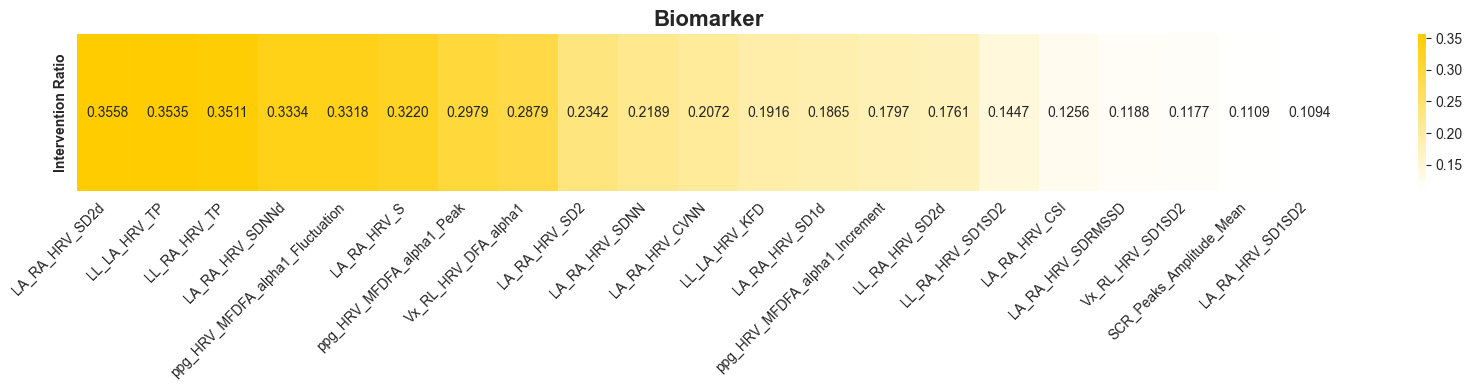

✅ 이미지 'feature_heatmap.png' 저장 및 출력 성공!


In [26]:
plot_intervene_features(intervene_df)